## Testing Python Tools for importing GPR Data

#### Here we tested diffrent import tools for sgy data to import and analyse the data so we can find the important Informations
- Chapter 1: Testing obspy segyio for import
- chapter 2: What is Important Information
- Chapter 3: Ploting Radargramms
- Chapter 4: Testing if Data is 3D,  2D


### Chapter 1: Testing obspy segyio for import

##### First we try to load the sgy files with obspy
**Note: We had to manaully upload the sgy files because some are to large to handle for GitHub** \
That the code works it is best to upload the File into the Folder **Data/Testdata/Files** \
**Also important is that we analyse the data on Both Files that were given**

In [3]:
#Importing used Packages to load the File
import sys
from pathlib import Path

#Setting Working directory
sys.path.append(str(Path.cwd().parent))

#Import the config file so that only the Filename needs to be changed in the _read_segy function
from config import *

from obspy.io.segy.segy import _read_segy

# load segy
obspy_1 = _read_segy(TEST_FILE_DIR / "UG3DQUERUNTERZUG.SGY")
obspy_2 = _read_segy(TEST_FILE_DIR / "EG-3D QUER001.SGY")







#### Now we try to  import the data with segyio

In [5]:
import segyio
#Importing used Packages to load the File
import sys
from pathlib import Path

#Setting Working directory
sys.path.append(str(Path.cwd().parent))

#Import the config file so that only the Filename needs to be changed in the _read_segy function
from config import *

filename_1 = TEST_FILE_DIR / "UG3DQUERUNTERZUG.SGY"
filename_2 = TEST_FILE_DIR / "EG-3D QUER001.SGY"
segyio_1 = segyio.open(filename_1,"r", ignore_geometry=True)
segyio_2 = segyio.open(filename_2,"r", ignore_geometry=True)


## Chapter2: What are important information? 

A sgy File has the following Byte structure according to "Seg y Rev2 1-Oct2023 | PDF | Integer (Computer Science) | Computer File», Scribd. Zugegriffen: 26. Oktober 2025. [Online]. Verfügbar unter: https://www.scribd.com/document/804232671/seg-y-rev2-1-oct2023"
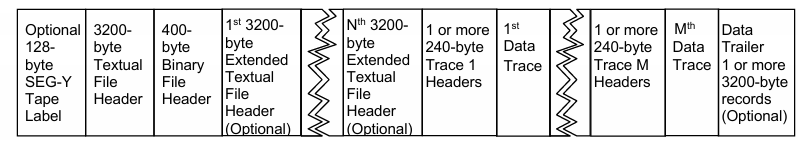


Out of the Structure of the SGY File Format we can see that there could be important information in the diffrent headers.Next step is to print the Headers with both types of import tools for SGY Files

##### Text Header

According to our source we should get this structure in the header

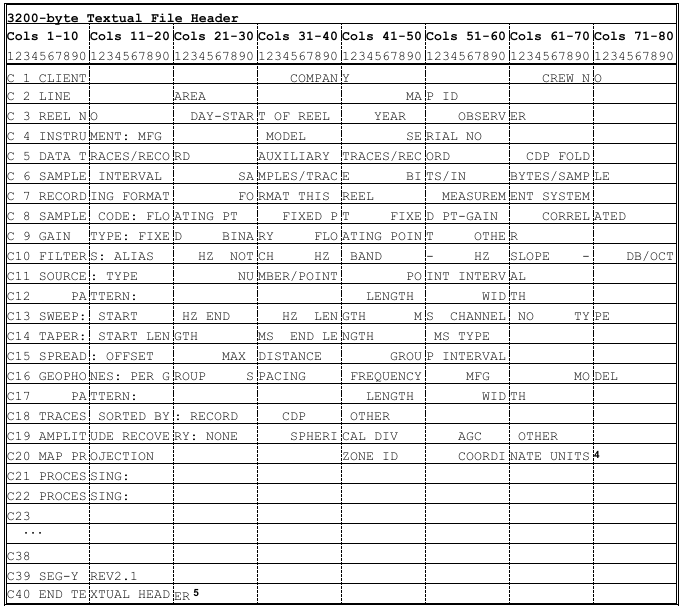

In [6]:
import codecs
## obspy Textual File Header for first file
textual_file_header = obspy_1.textual_file_header

#decode the header
decoded_header = codecs.decode(textual_file_header, "cp500")

for line in range(0, len(decoded_header), 80):
    print(decoded_header[line:line+80])

C 1                                                                             
C 2                                                                             
C 3                                                                             
C 4                                                                             
C 5                                                                             
C 6                                                                             
C 7                                                                             
C 8                                                                             
C 9                                                                             
C10                                                                             
C11                                                                             
C12                                                                             
C13                         

In [ ]:
import codecs
## obspy Textual File Header for second file
textual_file_header = obspy_2.textual_file_header

#decode the header
decoded_header = codecs.decode(textual_file_header, "cp500")

for line in range(0, len(decoded_header), 80):
    print(decoded_header[line:line+80])

C 1                                                                             
C 2                                                                             
C 3                                                                             
C 4                                                                             
C 5                                                                             
C 6                                                                             
C 7                                                                             
C 8                                                                             
C 9                                                                             
C10                                                                             
C11                                                                             
C12                                                                             
C13                         

In [9]:
## segyio Textual File Header for first file
textual_file_header_segyio = segyio.tools.wrap(segyio_1.text[0])
print(textual_file_header_segyio)




C 1
C 2
C 3
C 4
C 5
C 6
C 7
C 8
C 9
C10
C11
C12
C13
C14
C15
C16
C17
C18
C19
C20
C21
C22
C23
C24
C25
C26
C27
C28
C29
C30
C31
C32
C33
C34
C35
C36
C37
C38
C39
C40 ED EBCDIC


In [10]:
## segyio Textual File Header for second file
textual_file_header_segyio = segyio.tools.wrap(segyio_2.text[0])
print(textual_file_header_segyio)

C 1
C 2
C 3
C 4
C 5
C 6
C 7
C 8
C 9
C10
C11
C12
C13
C14
C15
C16
C17
C18
C19
C20
C21
C22
C23
C24
C25
C26
C27
C28
C29
C30
C31
C32
C33
C34
C35
C36
C37
C38
C39
C40 ED EBCDIC


As we now managed to print the Text File Header with both tools and for both files we can see now that there are is no information captured in the Text File Header.

##### Binary Header

Now we try to get Information from the binary File Header. Because it contains binary values which are relevant to the whole SGY file. Which according to our source is structured as follows

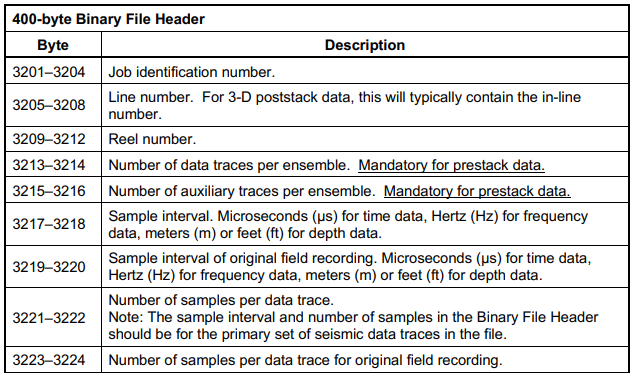
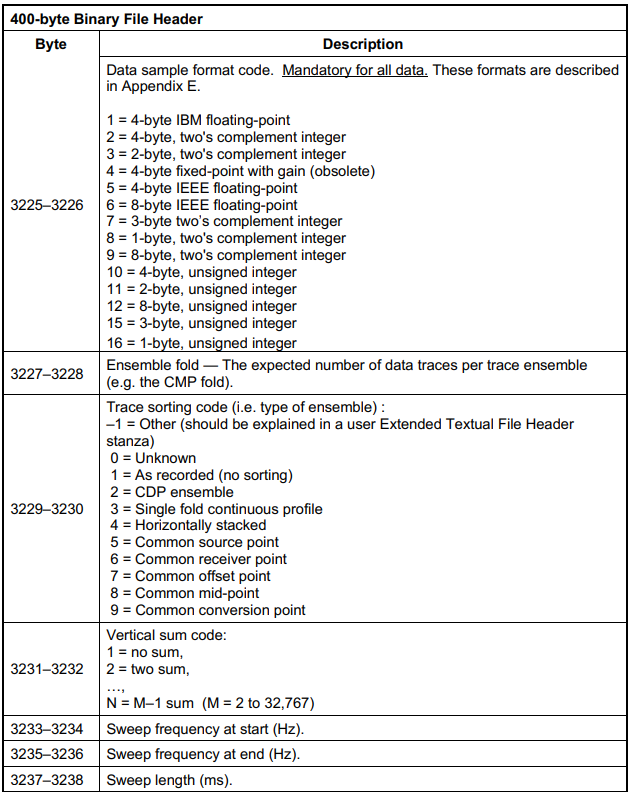
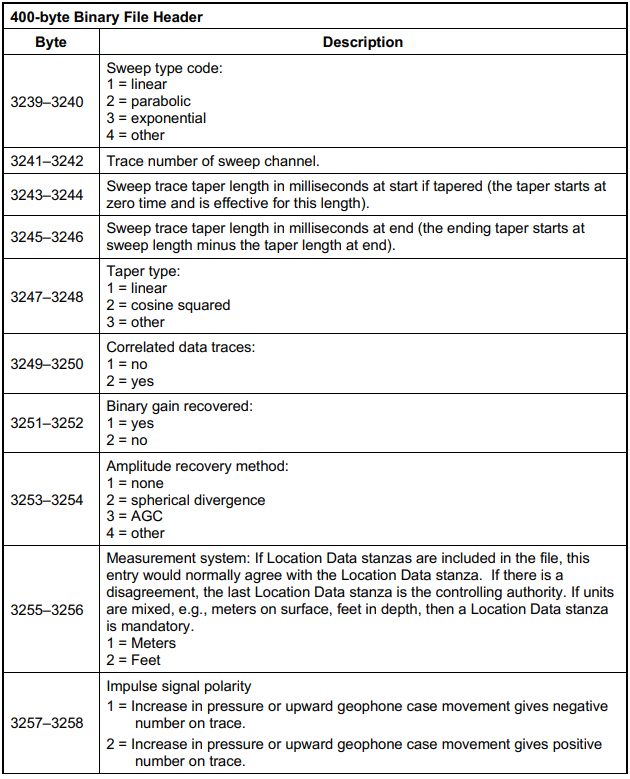
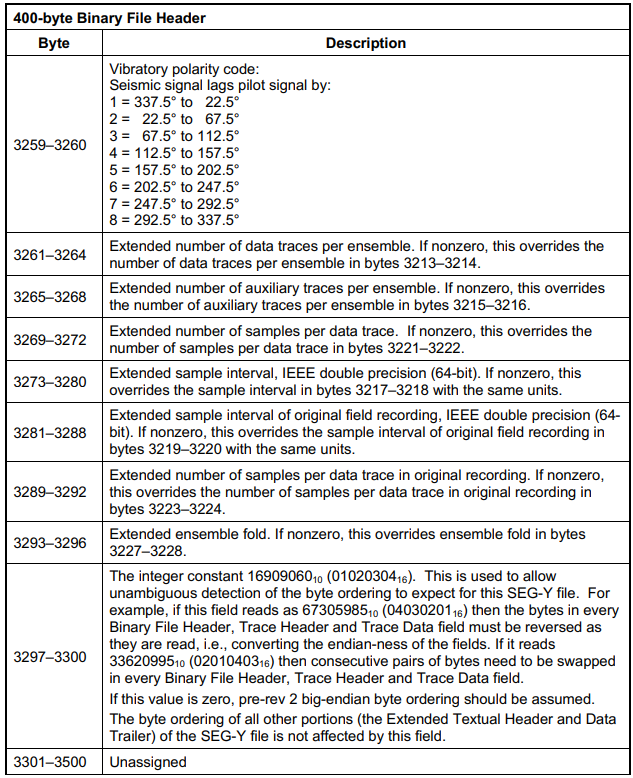
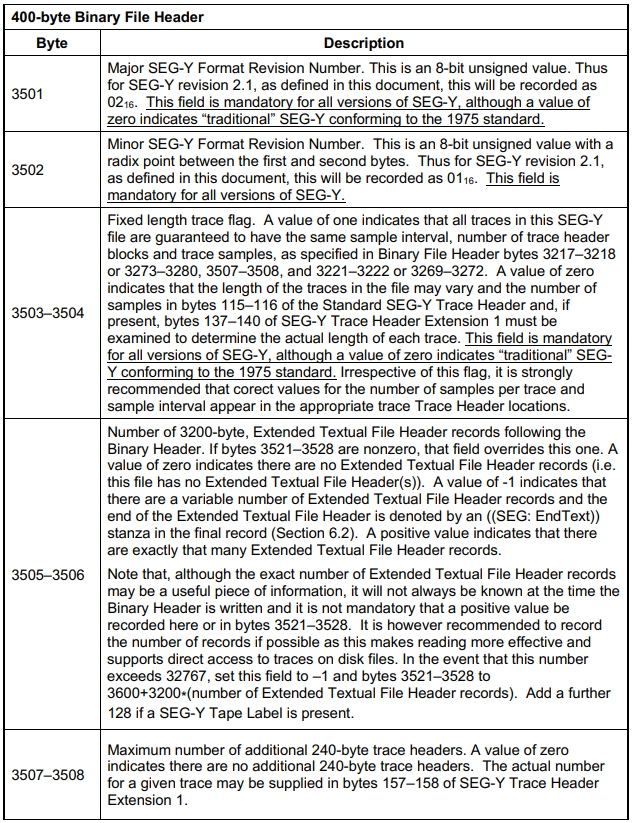
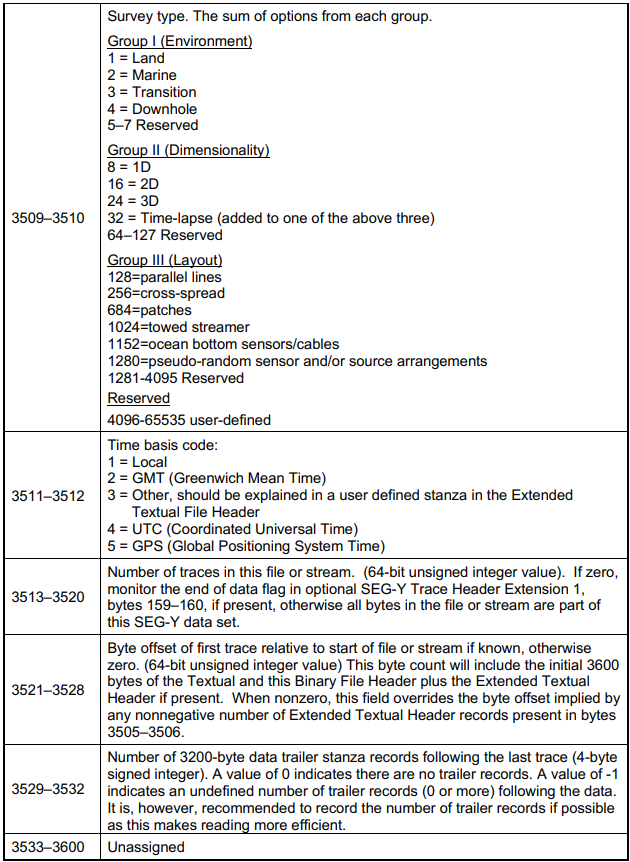



In [ ]:
#Binary Header for obspy for file 1
binary_header_obspy_1 = obspy_1.binary_file_header
print(binary_header_obspy_1)

Binary File Header:
	job_identification_number: 0
	line_number: 0
	reel_number: 0
	number_of_data_traces_per_ensemble: 1
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 49
	sample_interval_in_microseconds_of_original_field_recording: 0
	number_of_samples_per_data_trace: 400
	number_of_samples_per_data_trace_for_original_field_recording: 0
	data_sample_format_code: 3
	ensemble_fold: 1
	trace_sorting_code: 0
	vertical_sum_code: 0
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 0
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 0
	binary_gain_recovered: 0
	amplitude_recovery_method: 0
	measurement_system: 1
	impulse_signal_polarity: 0
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [ ]:
#Binary Header for obspy for file 2
binary_header_obspy_2 = obspy_2.binary_file_header
print(binary_header_obspy_2)

Binary File Header:
	job_identification_number: 0
	line_number: 0
	reel_number: 0
	number_of_data_traces_per_ensemble: 1
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 49
	sample_interval_in_microseconds_of_original_field_recording: 0
	number_of_samples_per_data_trace: 400
	number_of_samples_per_data_trace_for_original_field_recording: 0
	data_sample_format_code: 3
	ensemble_fold: 1
	trace_sorting_code: 0
	vertical_sum_code: 0
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 0
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 0
	binary_gain_recovered: 0
	amplitude_recovery_method: 0
	measurement_system: 1
	impulse_signal_polarity: 0
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [33]:
#Binary Header for segyio for file 1
from pprint import pprint
bin_header_segyio_1 = dict(segyio_1.bin)
pprint(bin_header_segyio_1)


{Traces: 1,
 AuxTraces: 0,
 SamplesOriginal: 0,
 Format: 3,
 MeasurementSystem: 1,
 ImpulseSignalPolarity: 0,
 Interval: 49,
 IntervalOriginal: 0,
 Samples: 400,
 BinaryGainRecovery: 0,
 AmplitudeRecovery: 0,
 VerticalSum: 0,
 SweepFrequencyStart: 0,
 SweepLength: 0,
 Sweep: 0,
 SweepFrequencyEnd: 0,
 SweepTaperEnd: 0,
 Taper: 0,
 CorrelatedTraces: 0,
 ExtAuxTraces: 0,
 ExtSamples: 0,
 ExtSamplesOriginal: 0,
 ExtEnsembleFold: 0,
 SEGYRevision: 0,
 SEGYRevisionMinor: 0,
 TraceFlag: 0,
 ExtendedHeaders: 0,
 VibratoryPolarity: 0,
 SweepChannel: 0,
 SweepTaperStart: 0,
 LineNumber: 0,
 ReelNumber: 0,
 EnsembleFold: 1,
 SortingCode: 0,
 JobID: 0}


In [38]:
#Binary Header for segyio for file 1
from pprint import pprint
bin_header_segyio_2 = dict(segyio_2.bin)
pprint(bin_header_segyio_2)

{Traces: 1,
 AuxTraces: 0,
 SamplesOriginal: 0,
 Format: 3,
 MeasurementSystem: 1,
 ImpulseSignalPolarity: 0,
 Interval: 49,
 IntervalOriginal: 0,
 Samples: 400,
 BinaryGainRecovery: 0,
 AmplitudeRecovery: 0,
 VerticalSum: 0,
 SweepFrequencyStart: 0,
 SweepLength: 0,
 Sweep: 0,
 SweepFrequencyEnd: 0,
 SweepTaperEnd: 0,
 Taper: 0,
 CorrelatedTraces: 0,
 ExtAuxTraces: 0,
 ExtSamples: 0,
 ExtSamplesOriginal: 0,
 ExtEnsembleFold: 0,
 SEGYRevision: 0,
 SEGYRevisionMinor: 0,
 TraceFlag: 0,
 ExtendedHeaders: 0,
 VibratoryPolarity: 0,
 SweepChannel: 0,
 SweepTaperStart: 0,
 LineNumber: 0,
 ReelNumber: 0,
 EnsembleFold: 1,
 SortingCode: 0,
 JobID: 0}


We spot imeediatly a diffrence between the 2 Packages segyio and obspy. It seems like the segyio Package has much shorter Key Names as the obspy version. But for both it seems they are not sorted according to Bytes. But that is not a big problem. But for intepretation according to the keys segyio seems more intuitive according to the source.

But what we can dorectly see is that we have the **SGY rev Version 1** because of the Field **SEGYRevision: 0** so we make the further analysis based on this source  https://library.seg.org/pb-assets/technical-standards/seg_y_rev1-1686080991247.pdf 
https://library.seg.org/pb-assets/technical-standards/seg_y_rev0-1686080980707.pdf


The Binary Header is structured as follows

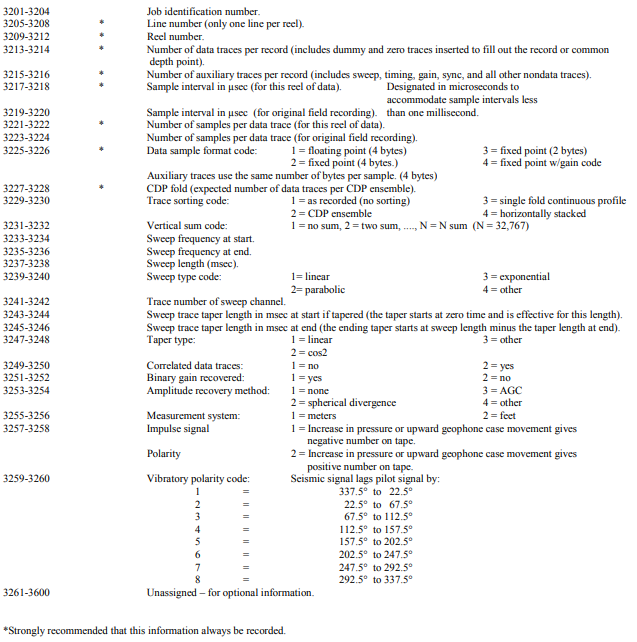

Since in our Data given most of the values are zero we focus on the Data which is captured in the Binary Header. Next Step is to get the captured Data and map them to the above picture. And from here on we continue with segyio because the headers are more intuitive to read.

In [ ]:
# get the header fields with information file1
# create a Real dict out of 
bin_header_dict_segyio_1 = dict(bin_header_segyio_1)
for key, value in bin_header_dict_segyio_1.items():
    if value > 0 :
        print(f"{key}: {value}")


Traces: 1
Interval: 49
Samples: 400
Format: 3
EnsembleFold: 1
MeasurementSystem: 1


In [39]:
# get the header fields with information file2
# create a Real dict out of 
bin_header_dict_segyio_2 = dict(bin_header_segyio_2)
for key, value in bin_header_dict_segyio_1.items():
    if value > 0 :
        print(f"{key}: {value}")

Traces: 1
Interval: 49
Samples: 400
Format: 3
EnsembleFold: 1
MeasurementSystem: 1


Since file 1 and File 2 are excactly the same 
we find the following meanings:

 |Field|Value|Meaning|
 |-----|-----|-------|
 |Traces|1|Number of Data Traces per Record|
 |Interval|49|Sample Interval in (microseconds)|
 |Format|3|Data Sample Format code: 3 is fixed point|
 |EnsembleFold|1|Number of expected data traces per CDP ensemble|
 |measurement System|1|meter|

As next step we look at the Trace Headers

##### Trace Header

According to our Source the fields should be like this.

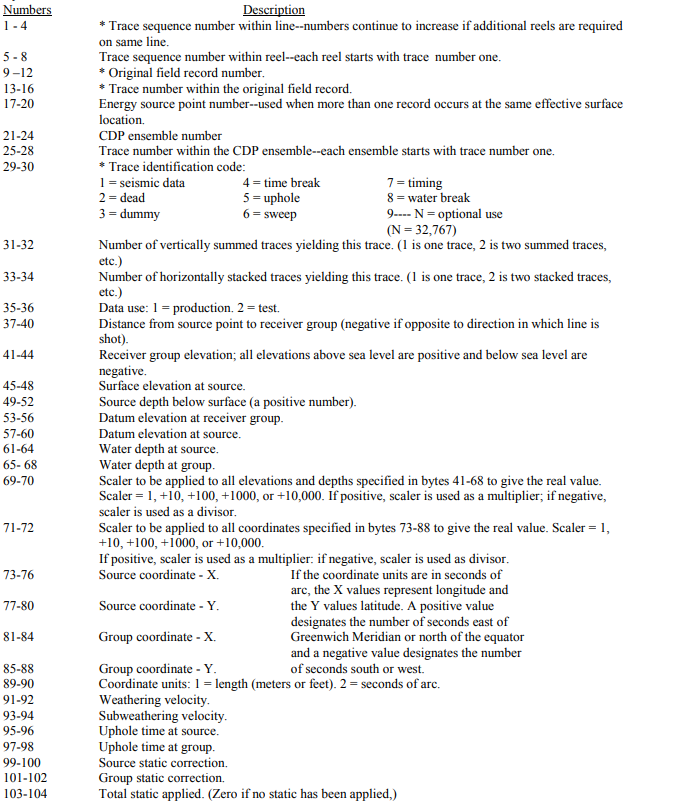
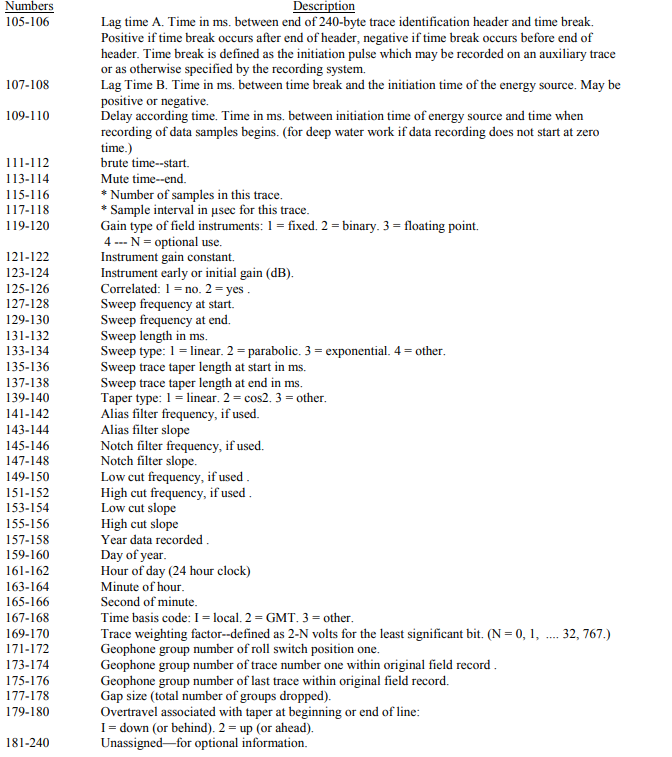

We try now to get the trace headear for one trace per file with segyio

In [40]:
#trace Header from trace 1 and file 1
from pprint import pprint
trace_header_0_file_1 = dict(segyio_1.header[0])
pprint(trace_header_0_file_1)

{TraceNumber: 1,
 EnergySourcePoint: 1,
 NSummedTraces: 0,
 NStackedTraces: 0,
 GroupY: 0,
 CoordinateUnits: 0,
 CDP: 1,
 CDP_TRACE: 0,
 TraceIdentificationCode: 1,
 SourceY: 0,
 GroupX: 0,
 ReceiverGroupElevation: 0,
 SourceSurfaceElevation: 0,
 ReceiverDatumElevation: 0,
 SourceDatumElevation: 0,
 SourceDepth: 0,
 ElevationScalar: 1,
 SourceGroupScalar: 1,
 SourceX: 0,
 GroupUpholeTime: 0,
 SourceUpholeTime: 0,
 SourceStaticCorrection: 0,
 GroupStaticCorrection: 0,
 TotalStaticApplied: 0,
 LagTimeA: 0,
 LagTimeB: 0,
 DelayRecordingTime: 0,
 MuteTimeStart: 0,
 MuteTimeEND: 0,
 TRACE_SAMPLE_COUNT: 400,
 TRACE_SAMPLE_INTERVAL: 49,
 GainType: 0,
 InstrumentGainConstant: 0,
 InstrumentInitialGain: 0,
 Correlated: 0,
 SweepFrequencyStart: 0,
 SweepFrequencyEnd: 0,
 SweepLength: 0,
 SweepType: 0,
 SweepTraceTaperLengthStart: 0,
 SweepTraceTaperLengthEnd: 0,
 TaperType: 0,
 AliasFilterFrequency: 0,
 AliasFilterSlope: 0,
 NotchFilterFrequency: 0,
 NotchFilterSlope: 0,
 LowCutFrequency: 0,
 Hi

In [41]:
#trace Header from trace 1 and file 2
from pprint import pprint
trace_header_0_file_2 = dict(segyio_2.header[0])
pprint(trace_header_0_file_2)

{TraceNumber: 1,
 EnergySourcePoint: 1,
 NSummedTraces: 0,
 NStackedTraces: 0,
 GroupY: 0,
 CoordinateUnits: 0,
 CDP: 1,
 CDP_TRACE: 0,
 TraceIdentificationCode: 1,
 SourceY: 0,
 GroupX: 0,
 ReceiverGroupElevation: 0,
 SourceSurfaceElevation: 0,
 ReceiverDatumElevation: 0,
 SourceDatumElevation: 0,
 SourceDepth: 0,
 ElevationScalar: 1,
 SourceGroupScalar: 1,
 SourceX: 0,
 GroupUpholeTime: 0,
 SourceUpholeTime: 0,
 SourceStaticCorrection: 0,
 GroupStaticCorrection: 0,
 TotalStaticApplied: 0,
 LagTimeA: 0,
 LagTimeB: 0,
 DelayRecordingTime: 0,
 MuteTimeStart: 0,
 MuteTimeEND: 0,
 TRACE_SAMPLE_COUNT: 400,
 TRACE_SAMPLE_INTERVAL: 49,
 GainType: 0,
 InstrumentGainConstant: 0,
 InstrumentInitialGain: 0,
 Correlated: 0,
 SweepFrequencyStart: 0,
 SweepFrequencyEnd: 0,
 SweepLength: 0,
 SweepType: 0,
 SweepTraceTaperLengthStart: 0,
 SweepTraceTaperLengthEnd: 0,
 TaperType: 0,
 AliasFilterFrequency: 0,
 AliasFilterSlope: 0,
 NotchFilterFrequency: 0,
 NotchFilterSlope: 0,
 LowCutFrequency: 0,
 Hi

As we can see most of the information is zero so lets print out the information that is not 0

In [ ]:
# get the header fields with information file1
# create a Real dict out of 
trace_0_header_dict_segyio_1 = dict(trace_header_0_file_1)
for key, value in trace_0_header_dict_segyio_1.items():
    if value > 0 :
        print(f"{key}: {value}")

TRACE_SEQUENCE_LINE: 1
TRACE_SEQUENCE_FILE: 1
FieldRecord: 1
TraceNumber: 1
EnergySourcePoint: 1
CDP: 1
TraceIdentificationCode: 1
ElevationScalar: 1
SourceGroupScalar: 1
TRACE_SAMPLE_COUNT: 400
TRACE_SAMPLE_INTERVAL: 49
INLINE_3D: 1
CROSSLINE_3D: 1


In [43]:
# get the header fields with information file1
# create a Real dict out of 
trace_0_header_dict_segyio_2 = dict(trace_header_0_file_2)
for key, value in trace_0_header_dict_segyio_2.items():
    if value > 0 :
        print(f"{key}: {value}")

TRACE_SEQUENCE_LINE: 1
TRACE_SEQUENCE_FILE: 1
FieldRecord: 1
TraceNumber: 1
EnergySourcePoint: 1
CDP: 1
TraceIdentificationCode: 1
ElevationScalar: 1
SourceGroupScalar: 1
TRACE_SAMPLE_COUNT: 400
TRACE_SAMPLE_INTERVAL: 49
CROSSLINE_3D: 1


What we can see imediality is that there are some fields which are not present in the image according to the source. Especially the fields **CROSSLINE_3D, INLINE_3D, CDP_X, CDP_Y**. according to this source we find that there were a variaty of how the data is stored in the headers https://help.dugeo.com/m/faq/l/187050-why-am-i-having-issues-loading-seg-y?. And according to https://library.seg.org/pb-assets/technical-standards/seg_y_rev1-1686080991247.pdf those fields are at fixed postions for rev 1.0 according to following Table.

|Byte|Field Name|
|-|-|
|181-184|CDP_X|
|185-188|CDP_Y|
|189-192|INLINE_3D|
|193-196|CROSSLINE_3D|

We can check now if those fields are stored in the byte positions 181-240 to be sure that we have the rev 0

In [49]:
#Checking Bytepositions for file 1

for name in dir(segyio.TraceField):
    byte_pos = getattr(segyio.TraceField, name)
    if name.isupper() and byte_pos >= 181:
        value = trace_header_0_file_1.get(byte_pos, None)
        print(f"{name:25s} -> Byte {byte_pos} | Wert: {value}")

CDP_X                     -> Byte 181 | Wert: 0
CDP_Y                     -> Byte 185 | Wert: 0
CROSSLINE_3D              -> Byte 193 | Wert: 1
INLINE_3D                 -> Byte 189 | Wert: 1


In [50]:
#Checking Bytepositions for file 2

for name in dir(segyio.TraceField):
    byte_pos = getattr(segyio.TraceField, name)
    if name.isupper() and byte_pos >= 181:
        value = trace_header_0_file_2.get(byte_pos, None)
        print(f"{name:25s} -> Byte {byte_pos} | Wert: {value}")

CDP_X                     -> Byte 181 | Wert: 0
CDP_Y                     -> Byte 185 | Wert: 0
CROSSLINE_3D              -> Byte 193 | Wert: 1
INLINE_3D                 -> Byte 189 | Wert: 0


For the next step we show the meanings behind those fields anf the fields from above which where not equal to 0. which we declare as the most important Informations. for that we create a table like above 

| Field                    | Value | Meaning |
|---------------------------|--------|------------------|
| TRACE_SEQUENCE_LINE       | 1      | Position of the trace within the current line. |
| TRACE_SEQUENCE_FILE       | 1      | Position of the trace within the file. |
| FieldRecord               | 1      | Field record number where the trace was recorded. |
| TraceNumber               | 1      | Unique number identifying this trace within the record. |
| EnergySourcePoint         | 1      | Shot point or source location number. |
| CDP                       | 1      | Common Depth Point (gather identifier). |
| TraceIdentificationCode   | 1      | Type of trace (e.g., seismic data, dead trace, test, etc.). |
| ElevationScalar           | 1      | Scale factor applied to elevation values. |
| SourceGroupScalar         | 1      | Scale factor for source and receiver group coordinates. |
| TRACE_SAMPLE_COUNT        | 400    | Number of samples per trace. |
| TRACE_SAMPLE_INTERVAL     | 49     | Time interval between samples (microseconds). |
| CDP_X                     | 0      | X-coordinate of the CDP position. |
| CDP_Y                     | 0      | Y-coordinate of the CDP position. |
| INLINE_3D                 | 1      | Inline number (3D line index). |
| CROSSLINE_3D              | 1      | Crossline number (3D cross-index). |


And surley the most important information from the trace Headers are the fields **TraceNumber, INLINE_3D, CROSLINE_3D, TRACE_SAMPLE_COUNT, TRACE_SAMPLE_INTERVAL**. The Fields **TraceNumber, INLINE_3D, CROSLINE_3D** give us the 3D Structure so that means we can create the Radargramms. This means thath if we want to Plot the Radargramm from a Inline perspective we have to sort all Crosslines enumarting. And hence for a Crossline Plot we have to sort all Inlines. For a Timeslice Plot (bird perspective) we have to create a Matrix of Inlines X Crosslines for every Time Slice.

To easy axes the diffrent Amplitudes so the Data in the Traces we can create a DataFrame with the Structure as follows.

|Trace|Inline|Crossline|Amplitudes|
|-----|---|-|-|

In [53]:
#creating Dataframe for file 1
#optional crwation of a csv
import numpy as np
import pandas as pd
rows= []

inlines   = segyio_1.attributes(segyio.TraceField.INLINE_3D)[:]
crosslines = segyio_1.attributes(segyio.TraceField.CROSSLINE_3D)[:]

for i in range(segyio_1.tracecount):
    amp = np.array(segyio_1.trace[i])
    inl = inlines[i]
    cross = crosslines[i]
    rows.append({
        "trace": i,
        "inline": inl,
        "crossline": cross,
        "Amplitude": amp
    })
df1 = pd.DataFrame(rows)
#df.to_csv("inline_crossline_segyio.csv", index =False)
print(df1.head())


   trace  inline  crossline                                          Amplitude
0      0       1          1  [-20228, -14833, -12170, -9433, -11480, -12543...
1      1       1          2  [-19524, -15504, -13631, -10211, -10939, -1103...
2      2       1          3  [-18915, -16373, -15126, -10702, -10026, -9497...
3      3       1          4  [-18675, -16565, -15221, -10267, -9359, -9442,...
4      4       1          5  [-17714, -17046, -16254, -10498, -8612, -8687,...


In [54]:
#creating Dataframe for file 2
#optional crwation of a csv
import numpy as np
import pandas as pd
rows= []

inlines   = segyio_2.attributes(segyio.TraceField.INLINE_3D)[:]
crosslines = segyio_2.attributes(segyio.TraceField.CROSSLINE_3D)[:]

for i in range(segyio_2.tracecount):
    amp = np.array(segyio_2.trace[i])
    inl = inlines[i]
    cross = crosslines[i]
    rows.append({
        "trace": i,
        "inline": inl,
        "crossline": cross,
        "Amplitude": amp
    })
df2 = pd.DataFrame(rows)
#df.to_csv("inline_crossline_segyio.csv", index =False)
print(df2.head())

   trace  inline  crossline                                          Amplitude
0      0       0          1  [-3779, -4808, -5511, -5421, -7800, -8821, -89...
1      1       0          2  [-3556, -4759, -5628, -5542, -7783, -8609, -86...
2      2       0          3  [-3445, -4734, -5746, -5699, -7867, -8492, -83...
3      3       0          4  [-3323, -4768, -5893, -5817, -7865, -8306, -80...
4      4       0          5  [-3376, -4907, -6050, -5876, -7803, -8150, -78...


## Chapter 3 Plotting Radargramms

As mentioned above we can now plot the three diffrent cuts as Radargrams.

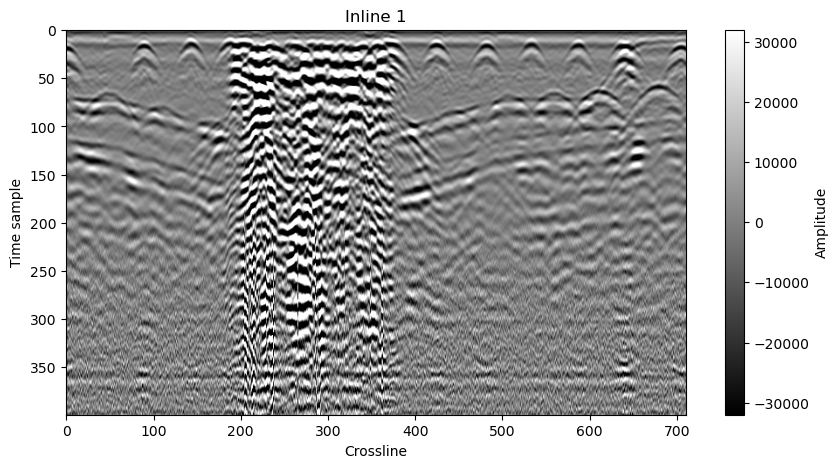

In [58]:
#Plot for file 1
#we take the first inline
import numpy as np
import matplotlib.pyplot as plt

def plot_inline(df, inlinenr):
    
    
    sub = df[df["inline"] == inlinenr].sort_values("crossline")
    traces = np.vstack(sub["Amplitude"].values)
    img = traces.T

    plt.figure(figsize=(10, 5))
    plt.imshow(img, cmap="grey", aspect="auto", origin="upper")
    plt.title(f"Inline {inlinenr}")
    plt.xlabel("Crossline")
    plt.ylabel("Time sample")
    plt.colorbar(label="Amplitude")
    plt.show()


plot_inline(df1, 1)

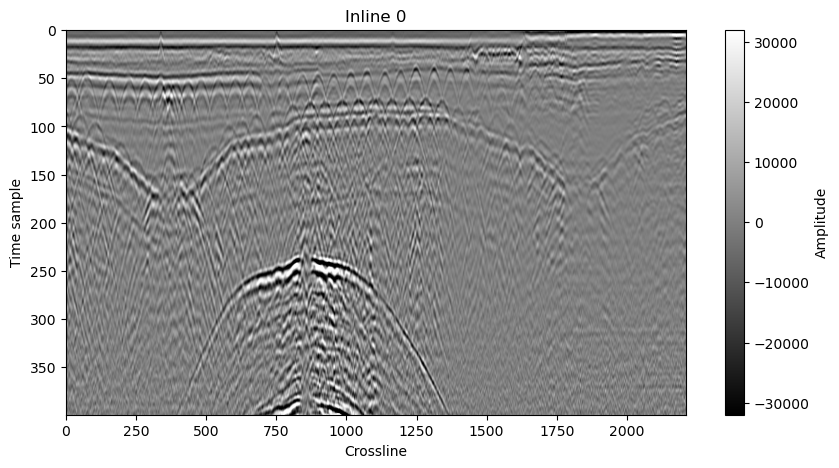

In [56]:
#Plot for file 2
#we take the firs inline
import numpy as np
import matplotlib.pyplot as plt

def plot_inline(df, inlinenr):
    
    
    sub = df[df["inline"] == inlinenr].sort_values("crossline")
    traces = np.vstack(sub["Amplitude"].values)
    img = traces.T

    plt.figure(figsize=(10, 5))
    plt.imshow(img, cmap="grey", aspect="auto", origin="upper")
    plt.title(f"Inline {inlinenr}")
    plt.xlabel("Crossline")
    plt.ylabel("Time sample")
    plt.colorbar(label="Amplitude")
    plt.show()


plot_inline(df2, 0)

what does a real 3D Dataset mean
- the crosslines in the Dataframe for each Line are repeating themselves and are not incremental

for example:

**3D Data**

| trace | inline | crossline | amplitude |
|--------|--------|-----------|-----------|
| 1      | 1      | 1         | ...       |
| 2      | 1      | 2         | ...       |
| 3      | 2      | 1         | ...       |
| 4      | 2      | 2         | ...       |


**Pseudo 3D**

| trace | inline | crossline | amplitude |
|--------|--------|-----------|-----------|
| 1      | 1      | 1         | ...       |
| 2      | 1      | 2         | ...       |
| 3      | 2      | 3         | ...       |
| 4      | 2      | 4         | ...       |


**2D Data**

| trace | inline | amplitude |
|--------|----------|-----------|
| 1      | 1        | ...       |
| 2      | 1    | ...       |
| 3      | 2    | ...       |
| 4      | 2    | ...       |


The Code below shows how we can test that


In [17]:
## Testing if Data is 3D , Pseudo 3D, or 2d

#extracting unique inlines and crosslines
inlines = df["inline"].unique()
crosslines = df["crossline"].unique()
traces = df["trace"].unique()

#checking if data is 2D
is_2d = (len(inlines) == 1) or (len(crosslines) == 1)

    

#creating a pivot table
pivot = df.pivot_table(index="inline", columns="crossline", aggfunc="size", fill_value=0)

if is_2d:
    data_type = "2D"
elif len(traces) == len(crosslines):
    data_type = "Pseudo 3D"
else:
    data_type = "3D"

print(f"traces: {len(traces)} | number of inlines: {len(inlines)} | number of crosslines: {len(crosslines)}| data type: {data_type}")
print("----------------------------------- Pivot Table ----------------------------------------------------")
pivot


traces: 42660 | number of inlines: 60 | number of crosslines: 711| data type: 3D
----------------------------------- Pivot Table ----------------------------------------------------


crossline  1    2    3    4    5    6    7    8    9    10   ...  702  703  \
inline                                                       ...             
1            1    1    1    1    1    1    1    1    1    1  ...    1    1   
2            1    1    1    1    1    1    1    1    1    1  ...    1    1   
3            1    1    1    1    1    1    1    1    1    1  ...    1    1   
4            1    1    1    1    1    1    1    1    1    1  ...    1    1   
5            1    1    1    1    1    1    1    1    1    1  ...    1    1   
6            1    1    1    1    1    1    1    1    1    1  ...    1    1   
7            1    1    1    1    1    1    1    1    1    1  ...    1    1   
8            1    1    1    1    1    1    1    1    1    1  ...    1    1   
9            1    1    1    1    1    1    1    1    1    1  ...    1    1   
10           1    1    1    1    1    1    1    1    1    1  ...    1    1   
11           1    1    1    1    1    1    1    1    1    1  ...    1    1   
12           1    1    1    1    1    1    1    1    1    1  ...    1    1   
13           1    1    1    1    1    1    1    1    1    1  ...    1    1   
14           1    1    1    1    1    1    1    1    1    1  ...    1    1   
15           1    1    1    1    1    1    1    1    1    1  ...    1    1   
16           1    1    1    1    1    1    1    1    1    1  ...    1    1   
17           1    1    1    1    1    1    1    1    1    1  ...    1    1   
18           1    1    1    1    1    1    1    1    1    1  ...    1    1   
19           1    1    1    1    1    1    1    1    1    1  ...    1    1   
20           1    1    1    1    1    1    1    1    1    1  ...    1    1   
21           1    1    1    1    1    1    1    1    1    1  ...    1    1   
22           1    1    1    1    1    1    1    1    1    1  ...    1    1   
23           1    1    1    1    1    1    1    1    1    1  ...    1    1   
24           1    1    1    1    1    1    1    1    1    1  ...    1    1   
25           1    1    1    1    1    1    1    1    1    1  ...    1    1   
26           1    1    1    1    1    1    1    1    1    1  ...    1    1   
27           1    1    1    1    1    1    1    1    1    1  ...    1    1   
28           1    1    1    1    1    1    1    1    1    1  ...    1    1   
29           1    1    1    1    1    1    1    1    1    1  ...    1    1   
30           1    1    1    1    1    1    1    1    1    1  ...    1    1   
31           1    1    1    1    1    1    1    1    1    1  ...    1    1   
32           1    1    1    1    1    1    1    1    1    1  ...    1    1   
33           1    1    1    1    1    1    1    1    1    1  ...    1    1   
34           1    1    1    1    1    1    1    1    1    1  ...    1    1   
35           1    1    1    1    1    1    1    1    1    1  ...    1    1   
36           1    1    1    1    1    1    1    1    1    1  ...    1    1   
37           1    1    1    1    1    1    1    1    1    1  ...    1    1   
38           1    1    1    1    1    1    1    1    1    1  ...    1    1   
39           1    1    1    1    1    1    1    1    1    1  ...    1    1   
40           1    1    1    1    1    1    1    1    1    1  ...    1    1   
41           1    1    1    1    1    1    1    1    1    1  ...    1    1   
42           1    1    1    1    1    1    1    1    1    1  ...    1    1   
43           1    1    1    1    1    1    1    1    1    1  ...    1    1   
44           1    1    1    1    1    1    1    1    1    1  ...    1    1   
45           1    1    1    1    1    1    1    1    1    1  ...    1    1   
46           1    1    1    1    1    1    1    1    1    1  ...    1    1   
47           1    1    1    1    1    1    1    1    1    1  ...    1    1   
48           1    1    1    1    1    1    1    1    1    1  ...    1    1   
49           1    1    1    1    1    1    1    1    1    1  ...    1    1   
50           1    1   

#### Plotting the GRID

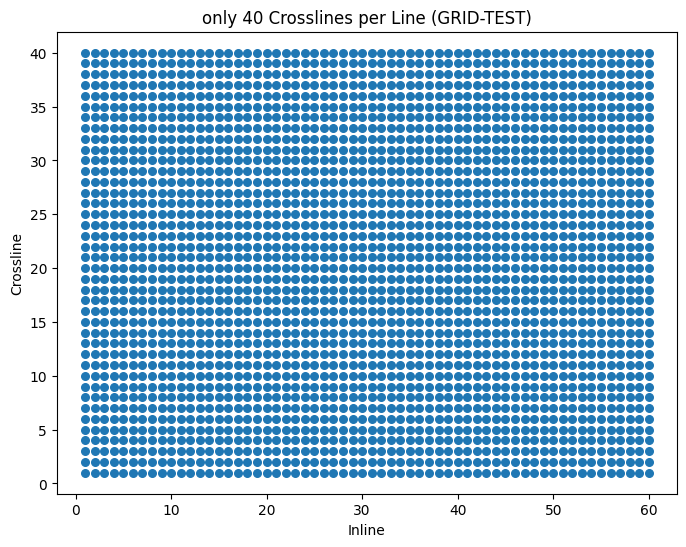

In [10]:
import matplotlib.pyplot as plt

cross = 40
df2 = df.sort_values(["inline", "crossline"]) \
        .groupby("inline") \
        .head(cross)

plt.figure(figsize=(8,6))
plt.scatter(df2["inline"], df2["crossline"], s=30)
plt.xlabel("Inline")
plt.ylabel("Crossline")
plt.title(f"only {cross} Crosslines per Line (GRID-TEST)")
plt.show()

## Chapter 4: Plotting Radargramms

#### Inline Radargramm
her we take one inline an Plot it

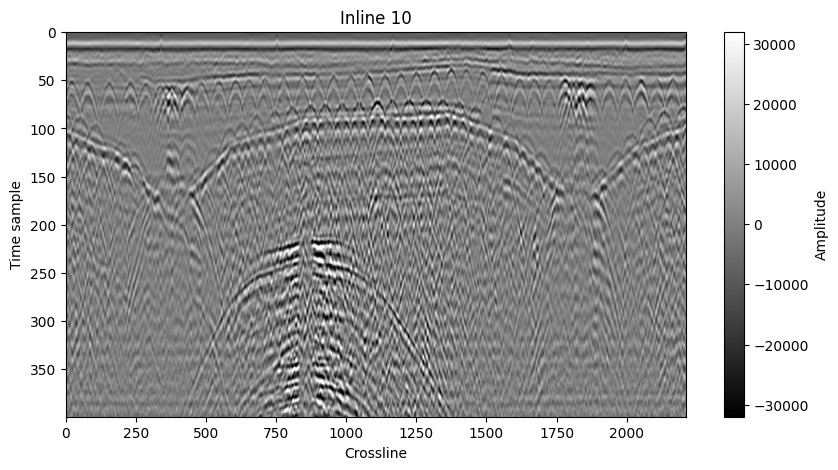

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_inline(df, inlinenr):
    
    
    sub = df[df["inline"] == inlinenr].sort_values("crossline")
    traces = np.vstack(sub["Amplitude"].values)
    img = traces.T

    plt.figure(figsize=(10, 5))
    plt.imshow(img, cmap="grey", aspect="auto", origin="upper")
    plt.title(f"Inline {inlinenr}")
    plt.xlabel("Crossline")
    plt.ylabel("Time sample")
    plt.colorbar(label="Amplitude")
    plt.show()


plot_inline(df, 10)

#### Crossline radargram
so here we take one crossline and plot the Radargramm

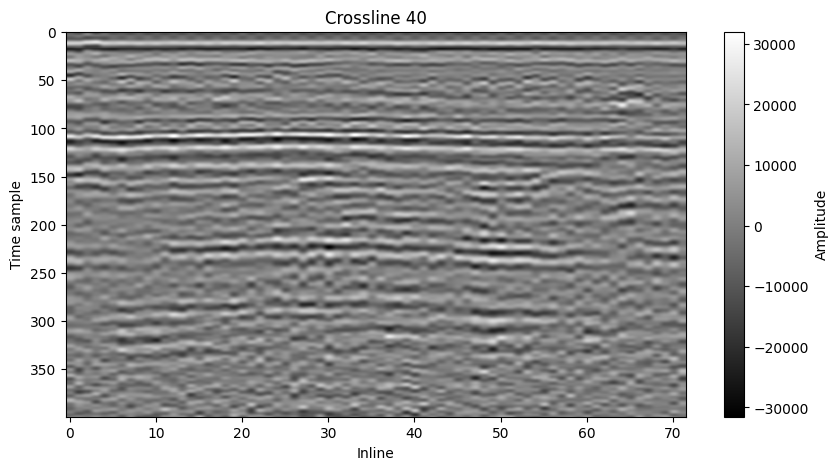

In [8]:
def plot_crossline(df, cross_nr):
    sub = df[df["crossline"] == cross_nr].sort_values("inline")
    traces = np.vstack(sub["Amplitude"].values)
    img = traces.T

    plt.figure(figsize=(10, 5))
    plt.imshow(img, cmap="gray", aspect="auto", origin="upper")
    plt.title(f"Crossline {cross_nr}")
    plt.xlabel("Inline")
    plt.ylabel("Time sample")
    plt.colorbar(label="Amplitude")
    plt.show()

plot_crossline(df, 40)

#### Ploting time Slice
here we take a time and Plot it its the top down view

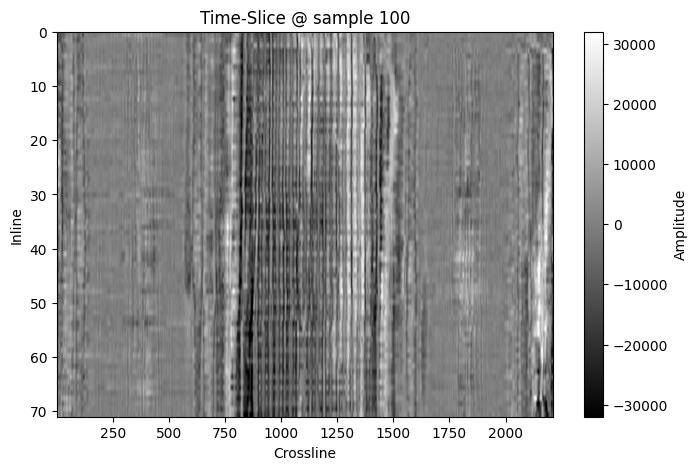

In [9]:
def plot_timeslice(df, sample_index):
    inlines = np.sort(df["inline"].unique())
    crosslines = np.sort(df["crossline"].unique())
    mat = np.full((len(inlines), len(crosslines)), np.nan)

    il_map = {v:i for i,v in enumerate(inlines)}
    cl_map = {v:i for i,v in enumerate(crosslines)}

    for _, row in df.iterrows():
        i = il_map[row["inline"]]
        j = cl_map[row["crossline"]]
        mat[i, j] = row["Amplitude"][sample_index]

    plt.figure(figsize=(8,5))
    plt.imshow(np.nan_to_num(mat), cmap="gray", aspect="auto",
               extent=[crosslines.min(), crosslines.max(), inlines.max(), inlines.min()])
    plt.title(f"Time-Slice @ sample {sample_index}")
    plt.xlabel("Crossline")
    plt.ylabel("Inline")
    plt.colorbar(label="Amplitude")
    plt.show()

plot_timeslice(df, 100)

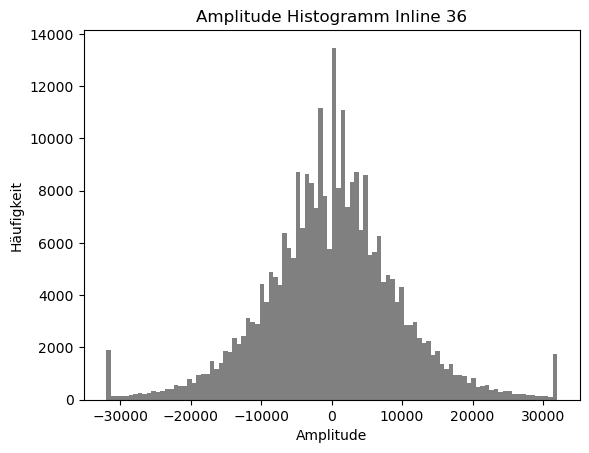

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



sub = df[df["inline"] == 10]  # Inline 36 auswählen
amp_values = np.concatenate(sub["Amplitude"].values)  # alle Traces zusammen

plt.hist(amp_values, bins=100, color="gray")
plt.xlabel("Amplitude")
plt.ylabel4("Häufigkeit")
plt.title("Amplitude Histogramm Inline 36")
plt.show()

